Sample Data Head:
   square_footage  num_bedrooms  num_bathrooms   price
0            1500             3              2  300000
1            2000             4              3  450000
2            1200             2              1  250000
3            2500             4              3  550000
4            1800             3              2  380000

Sample Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   square_footage  10 non-null     int64
 1   num_bedrooms    10 non-null     int64
 2   num_bathrooms   10 non-null     int64
 3   price           10 non-null     int64
dtypes: int64(4)
memory usage: 452.0 bytes
None

Training set size: 8 samples
Testing set size: 2 samples

Model Training Complete.

Model Evaluation:
Mean Squared Error (MSE): 770231796.42
Root Mean Squared Error (RMSE): 27753.05
R-squared (R2): 0.90

Model Coefficients:
s

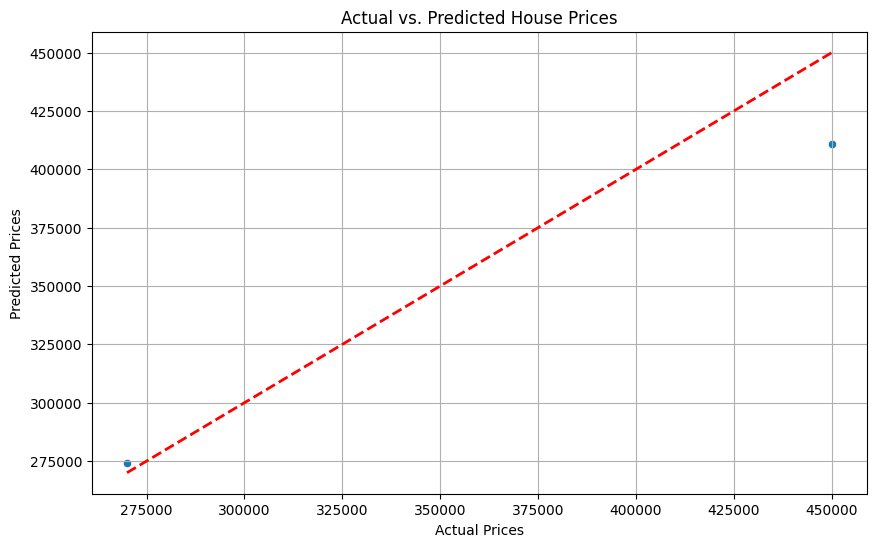


Predicted price for a new house with 2100 sqft, 4 bedrooms, and 3 bathrooms: $438095.24


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Generate Sample Data (Replace with your actual data loading) ---
# In a real scenario, you would load your data from a CSV, Excel, etc.
# For demonstration, let's create a synthetic dataset.
data = {
    'square_footage': [1500, 2000, 1200, 2500, 1800, 3000, 1600, 2200, 1300, 2800],
    'num_bedrooms': [3, 4, 2, 4, 3, 5, 3, 4, 2, 5],
    'num_bathrooms': [2, 3, 1, 3, 2, 4, 2, 3, 1, 4],
    'price': [300000, 450000, 250000, 550000, 380000, 650000, 320000, 480000, 270000, 600000]
}
df = pd.DataFrame(data)

print("Sample Data Head:")
print(df.head())
print("\nSample Data Info:")
print(df.info())

# --- 2. Define Features (X) and Target (y) ---
X = df[['square_footage', 'num_bedrooms', 'num_bathrooms']]
y = df['price']

# --- 3. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# --- 4. Initialize and Train the Linear Regression Model ---
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel Training Complete.")

# --- 5. Make Predictions on the Test Set ---
y_pred = model.predict(X_test)

# --- 6. Evaluate the Model ---
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# --- 7. Display Model Coefficients ---
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

# --- 8. Visualize Predictions vs. Actual (Optional but Recommended) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', lw=2) # Perfect prediction line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.grid(True)
plt.show()

# --- 9. Make a New Prediction (Example) ---
new_house_features = pd.DataFrame([[2100, 4, 3]], columns=['square_footage', 'num_bedrooms', 'num_bathrooms'])
predicted_price = model.predict(new_house_features)
print(f"\nPredicted price for a new house with 2100 sqft, 4 bedrooms, and 3 bathrooms: ${predicted_price[0]:.2f}")
